First moment maps, velocity anisotropy, 

print image every so often, 



In [1]:
import glob
from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (7, 7)

Populating the interactive namespace from numpy and matplotlib


/Users/mmcintosh/anaconda/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
import glob
from astropy.io import fits
infiles = glob.glob('datacubes/*')
for file in infiles:
    print(file)
    hdu_list = fits.open(file)
    print(hdu_list.info())
    print(hdu_list[0].header)
    print('*'*468)
    break



datacubes/ab-5_J2-1.fits
Filename: datacubes/ab-5_J2-1.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      27   (512, 512, 31)   float32   
None
SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    3 / number of data axes                            NAXIS1  =                  512 / length of data axis 1                          NAXIS2  =                  512 / length of data axis 2                          NAXIS3  =                   31 / length of data axis 3                          EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H BUNIT   = 'K       '           / Brightness temperature                         BZERO   =  

In [2]:
infiles = ['taurus_12co_cleaned.fits']#, 'taurus_13co_cleaned.fits']
for file in infiles: 
    
    # Read off some basic information
    print(file)
    hdu_list = fits.open(file)
    print(hdu_list.info())
    cube = hdu_list[0].data
    hdu_list.close()
    
    shape = np.shape(cube)
    print("cube: ",shape)
    rolledshape = np.roll(shape,1)
    print("rolledshape: ",rolledshape)
    cube = np.reshape(cube, rolledshape) 
    print(np.shape(cube))
    

    # retrieve the minimum CO velocities observed
    #vmin = -2.
    #vmax = 13.
    vmin = hdu_list[0].header['CRVAL1']
    v_step = hdu_list[0].header['CRVAL2']
    #v_step = ((vmax - vmin)/np.shape(cube)[2])
    print(v_step)
    
    # Integrate over velocity channels
    print(np.shape(cube)[0])
    integrated_map = np.sum(cube,0)/np.shape(cube)[0]
    print("done")

taurus_12co_cleaned.fits
Filename: taurus_12co_cleaned.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      74   (151, 2069, 1529)   float32   
None
cube:  (1529, 2069, 151)
rolledshape:  [ 151 1529 2069]
(151, 1529, 2069)
68.1858
151
done


(1529, 2069)


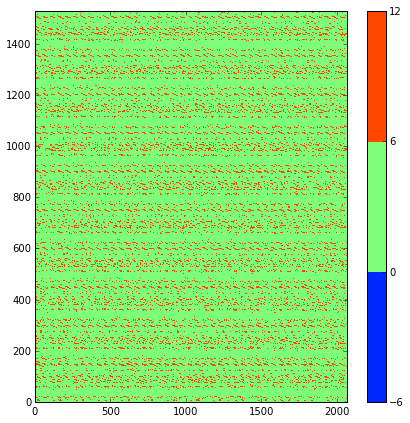

-1931.8142
(1, 1529, 2069)


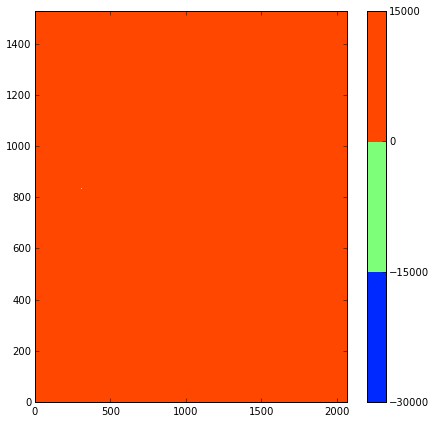

In [3]:
# velocity centroid map 
temp_cube=[]
channel = cube[70,:,:]
print(np.shape(channel))
fig = plt.figure()
ax111 = fig.add_subplot(111)
L1 = ax111.contourf(channel,2, interpolation='nearest')
cb = ax111.figure.colorbar(L1)
plt.show()
vk = vmin + v_step*1
print(vk)
temp_cube.append(vk*channel)
print(np.shape(temp_cube))
fig = plt.figure()
ax111 = fig.add_subplot(111)
L1 = ax111.contourf(temp_cube[0],2, interpolation='nearest')
cb = ax111.figure.colorbar(L1)
plt.show()



In [ ]:
for file in infiles: 
    
    # Read off some basic information
    print(file)
    hdu_list = fits.open(file)
    print(hdu_list.info())
    cube = hdu_list[0].data
    hdu_list.close()
    
    shape = np.shape(cube)
    print("cube: ",shape)
    rolledshape = np.roll(shape,1)
    print("rolledshape: ",rolledshape)
    cube = np.reshape(cube, rolledshape) 
    print(np.shape(cube))

    # retrieve the minimum CO velocities observed
    #vmin = -2.
    #vmax = 13.
    vmin = hdu_list[0].header['CRVAL1']
    v_step = hdu_list[0].header['CRVAL2']
    #v_step = ((vmax - vmin)/np.shape(cube)[2])
    print(v_step)
    
    # Integrate over velocity channels
    print(np.shape(cube)[0])
    integrated_map = np.sum(cube,0)/np.shape(cube)[0]

    # velocity centroid map 
    temp_cube = []
    for i in range(0,np.shape(cube)[0]):
        channel = cube[i,:,:]
        plt.contourf(channel)
        vk = vmin + v_step*i
        print(vk)
        temp_cube.append(channel + vk*channel)
        print(temp_cube)
        plt.contourf(temp_cube[0])
        break

    # do I still divide by # of channels?

    velocity_centroid_map = np.sum(temp_cube,0)#/integrated_map
    print(np.shape(cube), np.shape(temp_cube), np.shape(integrated_map), np.shape(velocity_centroid_map))
    '''
    # Plotting

    fig = plt.figure()
    ax111 = fig.add_subplot(111)

    # contours: 
    L1 = ax111.contourf(integrated_map,30, interpolation='nearest')
    # colorbar:
    cb = ax111.figure.colorbar(L1)
    cb.set_label('m/s', y=0.45)
    # labels
    ax111.set_xlabel("X Pixels")
    ax111.set_ylabel("Y Pixels") 
    ax111.set_title("Integrated Map for {0}".format(file))
    plt.show()
    ''' 
    # Plotting

    fig = plt.figure()
    ax111 = fig.add_subplot(111)

    # contours: 
    L1 = ax111.contourf(velocity_centroid_map,30, interpolation='nearest')
    # colorbar:
    cb = ax111.figure.colorbar(L1)
    cb.set_label('m/s', y=0.45)

    # labels
    ax111.set_xlabel("X Pixels")
    ax111.set_ylabel("Y Pixels") 
    ax111.set_title("Velocity Centroid for {0}".format(file))
    plt.show()


Populating the interactive namespace from numpy and matplotlib
datacubes/ab-5_J2-1.fits
Filename: datacubes/ab-5_J2-1.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      27   (512, 512, 31)   float32   
None
(31, 512, 512) (31, 512, 512) (512, 512)
(31, 512, 512) (31, 512, 512) (512, 512) (512, 512)


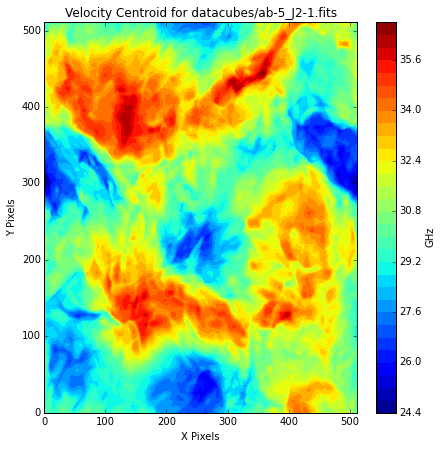

datacubes/ab-8_J2-1.fits
Filename: datacubes/ab-8_J2-1.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      27   (512, 512, 31)   float32   
None
(31, 512, 512) (31, 512, 512) (512, 512)
(31, 512, 512) (31, 512, 512) (512, 512) (512, 512)


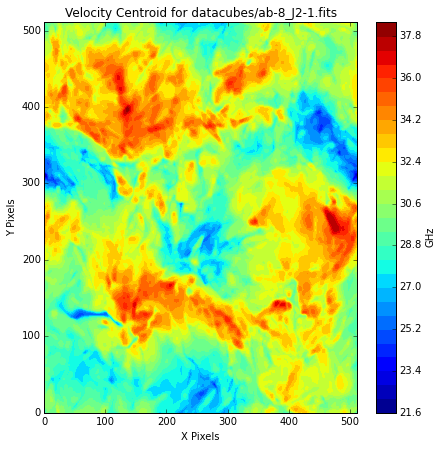

datacubes/dn275_J2-1.fits
Filename: datacubes/dn275_J2-1.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      27   (512, 512, 31)   float32   
None
(31, 512, 512) (31, 512, 512) (512, 512)
(31, 512, 512) (31, 512, 512) (512, 512) (512, 512)


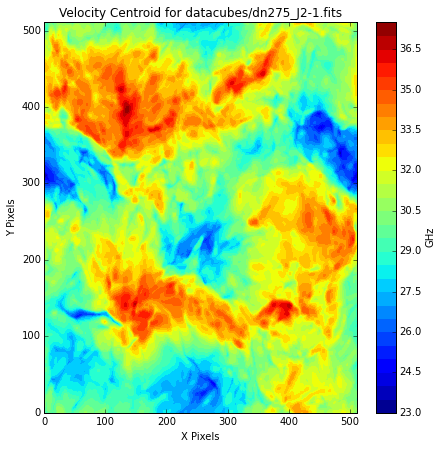

datacubes/dn8000_J2-1.fits
Filename: datacubes/dn8000_J2-1.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      27   (512, 512, 31)   float32   
None
(31, 512, 512) (31, 512, 512) (512, 512)
(31, 512, 512) (31, 512, 512) (512, 512) (512, 512)


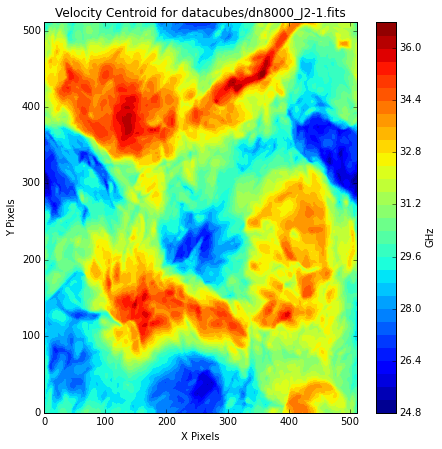

datacubes/dn9_J2-1.fits
Filename: datacubes/dn9_J2-1.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      27   (512, 512, 31)   float32   
None
(31, 512, 512) (31, 512, 512) (512, 512)
(31, 512, 512) (31, 512, 512) (512, 512) (512, 512)


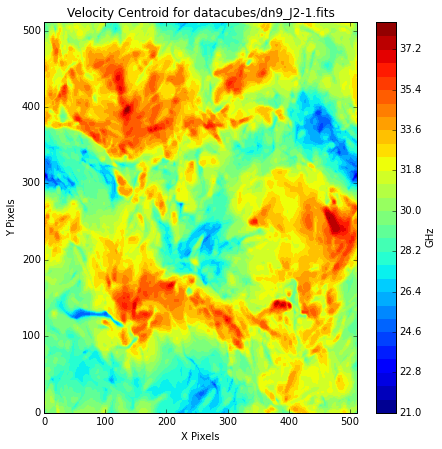

In [4]:
infiles = glob.glob('datacubes/*')

from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (7, 7)

for file in infiles: 
    print(file)
    hdu_list = fits.open(file)
    print(hdu_list.info())
    vmin = hdu_list[0].header['CRVAL3']
    v_step = hdu_list[0].header['CDELT3']
    cube = hdu_list[0].data
    hdu_list.close()
    integrated_map = np.sum(cube,0)/np.shape(cube)[2]

    # velocity centroid map 
    # these values are from the simulation

    temp_cube = []
    for i in range(0,np.shape(cube)[0]):
        channel = cube[i,:,:]
        vk = vmin + v_step*i
        temp_cube.append(channel + vk*channel)
    #check indexing:
    print(np.shape(cube), np.shape(temp_cube), np.shape(integrated_map))
    # do I still divide by # of channels?
    velocity_centroid_map = np.sum(temp_cube,0)/integrated_map
    #check indexing:
    print(np.shape(cube), np.shape(temp_cube), np.shape(integrated_map), np.shape(velocity_centroid_map))
    
    # Plotting

    fig = plt.figure()
    ax111 = fig.add_subplot(111)

    # contours: 
    L1 = ax111.contourf(velocity_centroid_map,30, interpolation='nearest')
    # colorbar:
    cb = ax111.figure.colorbar(L1)
    cb.set_label('GHz', y=0.45)

    # labels
    ax111.set_xlabel("X Pixels")
    ax111.set_ylabel("Y Pixels") 
    ax111.set_title("Velocity Centroid for {0}".format(file))
    plt.show()


In [32]:
print(np.shape(cube),np.shape(temp_cube),np.shape(integrated_map),np.shape(velocity_centroid_map))
print(np.shape(cube)[2])

(1529, 2069, 151) (1529, 2069) (151, 2069)
151


In [4]:
from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
pylab.rcParams['figure.figsize'] = (7, 7)


file='taurus_13co_cleaned.fits'
# Read off some basic information
print(file)
hdu_list = fits.open(file)
print(hdu_list.info())
cube = hdu_list[0].data
hdu_list.close()

print("cube: ")
print(np.shape(cube))
test = np.roll(cube, 1, axis=0)
print("test: ")
print(np.shape(test))
test = np.roll(cube, 1, axis=1)
print("test: ")
print(np.shape(test))
test = np.roll(cube, 1, axis=2)
print("test: ")
print(np.shape(test))


taurus_13co_cleaned.fits
Filename: taurus_13co_cleaned.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      74   (151, 2069, 1529)   float32   
None
cube: 
(1529, 2069, 151)
test: 
(1529, 2069, 151)
test: 
(1529, 2069, 151)
test: 
(1529, 2069, 151)


In [10]:
import numpy as np
a = np.arange(6).reshape((3,2,1))
b = a.reshape((1,3,2))
test = np.shape(a)
print("test: ",test)
testres = np.roll(test,1)
print("testres: ",testres)
c = np.reshape(a, testres) 
print(np.shape(c))

test:  (3, 2, 1)
testres:  [1 3 2]
(1, 3, 2)


0.0930153
0.0930153


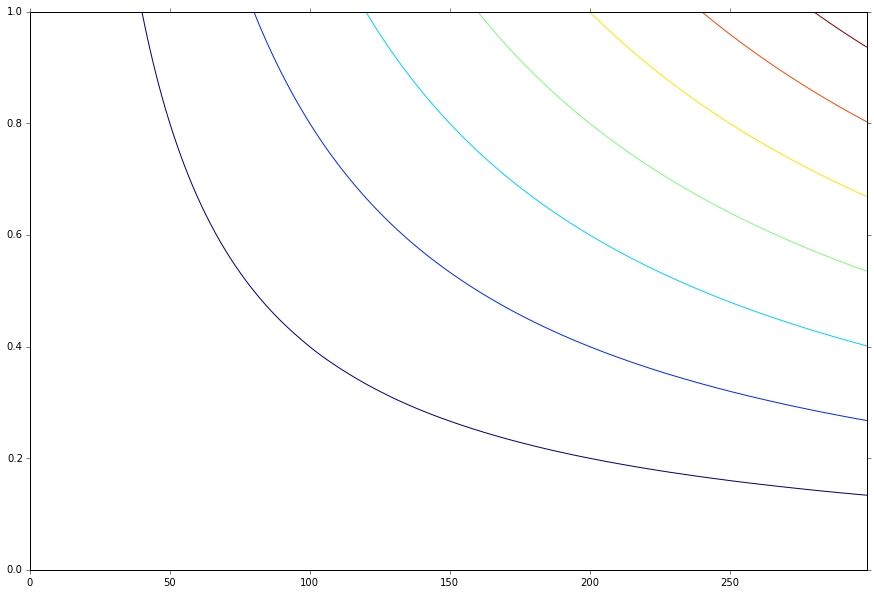

In [24]:

# problem: index out of bounds - what if my radius extends past my image?
#sf = np.mean((f(x) - f(x+r))^2)

def sf1(x,y):
    r = (np.sqrt((center[0] - x)**2 + (center[1] - y)**2))
    r = np.round(r).astype(int)
    temp = np.mean((integrated_map[x,y] - integrated_map[(x+r), (y+r)])**2)
    return temp
print sf1(x,y)

# Now I need map of SF vs r? 

def sf2(x,y, n):
    rarr = range(0,n,1)
    sf_arr = []
    for r in rarr: 
        temp = np.mean((integrated_map[x,y] - integrated_map[(x+r), (y+r)])**2)
        sf_arr.append(temp)
    return [sf_arr, rarr]
print sf1(x,y)
plt.contour(sf2(x,y, 300))
plt.show()

#plt.plot()



In [ ]:
#IDL Structure function code

FUNCTION sf_fft, field, no_fluct = no_fluct, mirror = mirror, const=const

sizefield=size(field)

N1=sizefield(1)
N2=1
N3=1
if sizefield(0) ge 2 then N2=sizefield(2)
if sizefield(0) ge 3 then N3=sizefield(3)
if sizefield(0) ge 4 then begin
   printf, -2, 'Well, please no more than 3 dimensions !'
   stop
endif

if not( keyword_set(no_fluct) ) then field1=field-mean(field,/double) $
else field1=field

fftfield=fft(field1,/double)
ps=fftfield*conj(fftfield)
acf=double(fft(ps,/inverse))

if keyword_set( mirror ) then begin
;Let's do here the trick of producing the mirror images   
    nyq1=N1/2
    nyq1_1=nyq1-1
    nyq2=N2/2
    nyq2_1=nyq2-1
    nyq3=N3/2
    nyq3_1=nyq3-1
    
    for i3=0,N3-1 do begin
        i3k=i3
        if i3 gt nyq3 then i3k=N3-i3
        for i2=0,N2-1 do begin
            i2k=i2
            if i2 gt nyq2 then i2k=N2-i2
            for i1=0,N1-1 do begin
                i1k=i1
                if i1 gt nyq1 then i1k=N1-i1
                acf[i1,i2,i3]=acf[i1k,i2k,i3k]
            endfor
        endfor
    endfor
    
endif

if keyword_set(no_fluct) then sf=2d*(mean( field1^(2d) )-acf ) $
else sf=2d*(variance(field1)-acf)

if keyword_set(const) then begin
    acf=acf-min(acf)
    sf=2d*(max(acf)-acf)
endif

return,sf

end


In [21]:
#IDL Structure function code translated to Python

#fake data
field = np.matrix([[7,2,1], [0,3,-1], [-3,4,-2]])
no_fluct = None
mirror = 5
const = 1


def sf_fft(field, no_fluct, mirror, const):
    sizefield=field.shape
    print sizefield
    n1 = sizefield[0] # must be integers
    print "n1",n1
    n2 = 1
    n3 = 1
    if sizefield[0] >= 2: 
        n2=sizefield[0]
        print "n2", n2
    if sizefield[0] >= 3:
        n3 = sizefield[0]
        print "n3", n3
    if sizefield[0] >= 4:
        raise TypeError("No more than 3 dimensions")
    
    if no_fluct != None:
        field1 = field - np.mean(field/field.astype(float))
    else:
        field1 = field
    
    fftfield = np.fft.fft(field1).astype(float)
    print "fftfield", fftfield
    ps = fftfield*np.conjugate(fftfield)
    print "ps",ps
    acf = np.fft.fft(ps/np.linalg.inv(ps)).astype(float)
    print "acf", acf

    
    if mirror != None:
        # produce mirror images
        nyq1 = n1/2
        nyq1_1 = nyq1 - 1
        nyq2 = n2/2
        nyq2_1 = nyq2 - 1
        nyq3 = n3/2
        nyq3_1 = nyq3 - 1
        
        for i3 in np.arange(0,n3-1):
            i3k = i3
            if i3 > nyq3:
                i3k= n3 - i3
            for i2 in np.arange(0, n2-1):
                if i2 > nyq2:
                    i2k = n2 - i2
                for i1 in np.arange(0, n1-1):
                    i1k = i1
                    if i1 > nyq1:
                        i1k = n1 -i1
                        acf[i1,i2,i3]=acf[i1k,i2k,i3k]
        #2d stuff d = 1                
        if no_fluct != None:
            sf = np.mean(field1**(2)-acf)
        else:
            sf = np.var(field1 - acf)
        
                        
        print "done"
        
        if const != None:
            acf = acf-np.min(acf)
            sf = (np.max(acf)-acf)
 
    return sf

sf_fft(field, no_fluct, mirror, const)




(3L, 3L)
n1 3
n2 3
n3 3
fftfield [[ 10.    5.5   5.5]
 [  2.   -1.   -1. ]
 [ -1.   -4.   -4. ]]
ps [[ 100.     30.25   30.25]
 [   4.      1.      1.  ]
 [   1.     16.     16.  ]]
acf [[  4.22895683e+02   2.94644690e+03   2.94644690e+03]
 [  6.67082716e-16   3.83630670e-15   3.83630670e-15]
 [  3.31100812e-14  -1.75975026e-14  -1.75975026e-14]]
done


array([[ 2523.55121294,     0.        ,     0.        ],
       [ 2946.44689554,  2946.44689554,  2946.44689554],
       [ 2946.44689554,  2946.44689554,  2946.44689554]])